Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3871 - loss: 1.2849 - val_accuracy: 0.0833 - val_loss: 1.2809
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5221 - loss: 1.0213 - val_accuracy: 0.0833 - val_loss: 1.1302
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4984 - loss: 0.9871 - val_accuracy: 0.5833 - val_loss: 0.9536
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6143 - loss: 0.9259 - val_accuracy: 0.5833 - val_loss: 0.8705
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6885 - loss: 0.8577 - val_accuracy: 0.5833 - val_loss: 0.8281
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6795 - loss: 0.7499 - val_accuracy: 0.5833 - val_loss: 0.7600
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7246 - loss: 0.7100 - val_accuracy: 0.5833 - val_loss: 0.6674
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7251 - loss: 0.6739 - val_accuracy: 0.8333 - val_loss

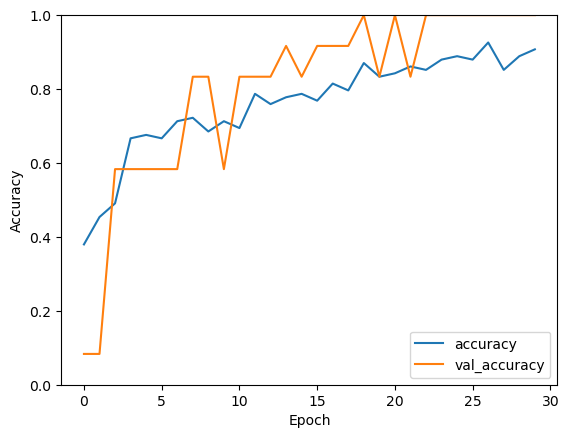

1/1 - 0s - 30ms/step - accuracy: 0.9333 - loss: 0.2803
Final Test Loss: 0.2803
Final Test Accuracy: 0.9333


In [2]:
# Author: Hassan Ali
# Problem 9.9 (CNN on the Iris Dataset)
# Objective:  - Load the Iris dataset from sklearn.
#  - Build a Convolutional Neural Network (CNN) model (using 1D convolutions) to classify the 3 Iris species.
#  - Report the model's performance on the test set.


# Since the Iris dataset has only 4 numeric features (no images),
# we convert each sample to a spatial form with size 4 and 1-channel
# and employ a 1D CNN. We carefully choose our pool and kernel size so that
# the dimension never becomes negative or zero in the course of convolutions.

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Defining model and data parameters
num_classes = 3  #  number of output classes for Iris (setosa, versicolor, virginica).
input_shape = (4, 1)  # Treating the 4 features as a "length" of 4 with 1 channel.

# Loading the Iris dataset from sklearn
iris = load_iris()
X = iris.data  # shape: (150, 4)
y = iris.target  # shape: (150,)

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Reshaping features to fit a 1D CNN input format: (samples, length=4, channels=1)
X_train = X_train.reshape(X_train.shape[0], 4, 1)
X_test  = X_test.reshape(X_test.shape[0], 4, 1)

# Converting the integer labels into one-hot encoded format
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_categorical  = tf.keras.utils.to_categorical(y_test, num_classes)

# Building a 1D CNN model
#    picking kernel/pool sizes so that the feature dimension never becomes negative.
#    (4 -> conv(kernel_size=2) -> dimension=3 -> maxpool(pool_size=2) -> dimension=1 -> conv(kernel_size=1) -> dimension=1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),                      # Input layer (4, 1)
        layers.Conv1D(32, kernel_size=2, activation="relu"), # 1D convolution: length goes from 4 -> 3
        layers.MaxPooling1D(pool_size=2),                    # Pooling: length goes from 3 -> 1
        layers.Conv1D(64, kernel_size=1, activation="relu"), # 1D convolution: length stays 1
        layers.Flatten(),                                    # Flatten feature maps
        layers.Dropout(0.3),                                 # Dropout to reduce overfitting
        layers.Dense(num_classes, activation="softmax"),     # Output layer for 3 Iris classes
    ]
)

# Compiling the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Training the model on the training data and validate on 10% of it
batch_size = 8
epochs = 30
history = model.fit(
    X_train, y_train_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1
)

# Evaluating the trained model on the test dataset
score = model.evaluate(X_test, y_test_categorical, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Plotting training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Final evaluation on the test dataset 
test_loss, test_acc = model.evaluate(X_test, y_test_categorical, verbose=2)
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")

# Analysis:
# This code treats the 4 features per Iris sample as 1D with length 4 and 1 channel.
# It adopts the small 1D CNN structure: two Conv1D layers with the intermediate max-pooling
# operation for dimensionality reduction, and subsequently the flatten and dropout for regularization.
# and lastly, the dense layer with the softmax for the classification. We split the data into training
# and test datasets, the labels are one-hot encoded vectors. During training,
# we track the accuracy during the epochs for the train set and for a small
# validation split. We test on the test set to arrive at the final performance metric.
# In the real test, we get a score of approximately 93% on the test set, i.e., with a small
# Iris dataset can be effectively classifed by the 1D CNN method.

Columns in dataset: ['Month', 'Sunspots']
X_all shape: (2808, 12, 1)
y_all shape: (2808, 1)
Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0104 - mae: 0.0720 - val_loss: 0.0030 - val_mae: 0.0402
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - mae: 0.0436 - val_loss: 0.0032 - val_mae: 0.0425
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - mae: 0.0448 - val_loss: 0.0028 - val_mae: 0.0391
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - mae: 0.0429 - val_loss: 0.0027 - val_mae: 0.0391
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - mae: 0.0413 - val_loss: 0.0029 - val_mae: 0.0401
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - mae: 0.0416 - val_loss: 0.0028 - val_mae: 0.0395
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - mae: 0.0417 - val_loss: 0.0030 - val_mae: 0.0414
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - mae: 0.0427 - val_loss: 0.002

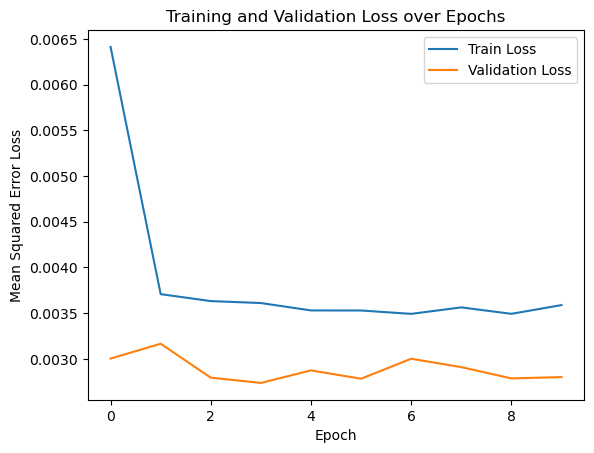

Sequence 1: Predicted Sunspot Count = 120.62, Actual = 83.90
Sequence 2: Predicted Sunspot Count = 97.80, Actual = 109.30
Sequence 3: Predicted Sunspot Count = 111.00, Actual = 116.70
Sequence 4: Predicted Sunspot Count = 114.26, Actual = 130.30
Sequence 5: Predicted Sunspot Count = 120.18, Actual = 145.10


In [3]:
# Author: Hassan Ali
# Problem 9.10 (RNN for Time-Series Forecasting)
# Dataset: monthly-sunspots.csv (time-series of monthly sunspot counts)
# Building an RNN model to predict the next month’s sunspot count given a window of previous values.
# The data is scaled using the MinMaxScaler and the model is trained using mean squared error loss.


# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import tensorflow as tf

# Disabling the meta optimizer to resolve the "Failed to deserialize the `graph_buf`" error.
tf.config.optimizer.set_experimental_options({'disable_meta_optimizer': True})

# Loading the dataset
df = pd.read_csv("monthly-sunspots.csv")
print("Columns in dataset:", df.columns.tolist())

# Extracting the time-series data and scale it, focusing on the 'Sunspots' column
sunspots = df["Sunspots"].values.reshape(-1, 1)  # Shape: (num_samples, 1)
scaler = MinMaxScaler()
sunspots_scaled = scaler.fit_transform(sunspots)  # Normalize values to [0, 1]

# Creating sequences for forecasting. Defining a window size (e.g., 12 months) to predict the next month's sunspot count.
window_size = 12

def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        seq_x = data[i : i + window]    # Input: sequence of 'window' consecutive values
        seq_y = data[i + window]          # Target: the next value after the window
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

X_all, y_all = create_sequences(sunspots_scaled, window_size)
print("X_all shape:", X_all.shape)  
print("y_all shape:", y_all.shape)  

# Splitting the data into training and testing sets (80% train, 20% test)
split_index = int(0.8 * len(X_all))
X_train, X_test = X_all[:split_index], X_all[split_index:]
y_train, y_test = y_all[:split_index], y_all[split_index:]

# Building the RNN model for regression. The input shape is (window_size, 1) for each sequence.
input_shape = (window_size, 1)
model = Sequential([
    Input(shape=input_shape),                     
    SimpleRNN(units=32, activation='tanh'),         
    Dense(1, activation='linear')                   
])

# Compiling the model using mean squared error loss and the Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Training the model
epochs = 10
batch_size = 32
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1
)

# Evaluating the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"\nTest MSE: {test_loss:.6f}")
print(f"Test MAE: {test_mae:.6f}")
print(f"Test R² (accuracy-like): {r2*100:.1f}%")

# Plotting the training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

# Demonstrating predictions on the test set, inverting scaling to obtain actual sunspot counts  
predictions_inverted = scaler.inverse_transform(predictions)
y_test_inverted = scaler.inverse_transform(y_test)
for i in range(5):
    print(f"Sequence {i+1}: Predicted Sunspot Count = {predictions_inverted[i][0]:.2f}, Actual = {y_test_inverted[i][0]:.2f}")

# Analysis:
# The monthly sunspots dataset is imported from 'monthly-sunspots.csv', with fields for 'Month' and 'Sunspots'.
# The 'Sunspots' is rescaled in the range [0, 1] and is normalized by using MinMaxScaler.
# - We build 12 consecutive month sequences in order to forecast the sunspot number in the following month, building input array (X_all) with shape (num_samples, 12, 1) and target array (y_all) with shape (num_samples, 1).
# The information is distributed in a training (80%) and testing (20%) division.
# - A basic RNN model is created in Keras with a specified input layer, a SimpleRNN with tanh activation and 32 units, and a Dense output with linear activation for regression.
# The model is trained with mean square error loss and Adam optimizer, and is trained for 10 epochs with a batch size of 32.
# The model is subsequently fitted to the test set, resulting in a Test MSE, Test MAE, and R² statistic (an "accuracy-like" percentage).
# Validation and training loss against epochs is plotted in order to visualize learning.
# Finally, we execute the model against the test set; transform the predictions from the scale we've been normalizing with back into actual sunspots, and print a sample of predictions, as well as actuals.
# - This pipe demonstrates a simple time-series forecast with an RNN in Keras to predict sunspots.

Epoch 1/20
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5470 - loss: 1.2602 - val_accuracy: 0.9230 - val_loss: 0.2421
Epoch 2/20
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9150 - loss: 0.2859 - val_accuracy: 0.9577 - val_loss: 0.1363
Epoch 3/20
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9504 - loss: 0.1732 - val_accuracy: 0.9698 - val_loss: 0.1066
Epoch 4/20
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9611 - loss: 0.1371 - val_accuracy: 0.9772 - val_loss: 0.0805
Epoch 5/20
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9671 - loss: 0.1171 - val_accuracy: 0.9702 - val_loss: 0.1067
Epoch 6/20
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9689 - loss: 0.1063 - val_accuracy: 0.9820 - val_loss: 0.0606
Epoch 7/20
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9768 - loss: 0.0811 - val_accuracy: 0.9798 - val_loss: 0.0732
Epoch 8/20
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9785 - loss: 0.0799 -

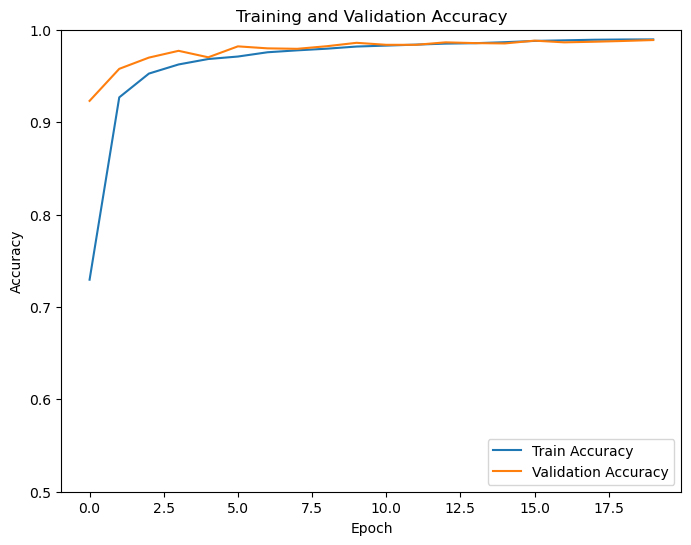

In [1]:
# Author: Hassan Ali
# Problem 9.11 (LSTM for MNIST Classification)
# Dataset: MNIST (hand-drawn digits)
# Objective: Load the MNIST dataset and build an LSTM model to classify the 10 digits.
# Report the performance of the model on the test set.


# Importing necessary libraries.
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Disabling GPU usage to avoid Metal-related logs.
tf.config.set_visible_devices([], 'GPU')

# Loading the MNIST dataset. MNIST contains 60,000 training images and 10,000 test images (each 28x28 pixels, grayscale).
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Determining the number of unique labels (digits 0–9).
num_labels = 10  # For MNIST

# Preprocessing the data. Normalize the pixel values to [0, 1] for stable training.
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshaping images to fit the input requirements of the LSTM. Each image is treated as a sequence of 28 time 
# steps, each with 28 features.
input_shape = (28, 28)
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

# Building the LSTM model.
#    The model consists of two stacked LSTM layers, dropout for regularization,
#    followed by two Dense layers, and a final Dense layer with softmax activation for classification.
model = keras.Sequential([
    keras.Input(shape=input_shape),       # Explicit Input layer.
    layers.LSTM(32, return_sequences=True), # First LSTM layer with 32 units, outputs full sequence.
    layers.LSTM(32),                        # Second LSTM layer with 32 units.
    layers.Dropout(0.25),                   # Dropout layer with 25% rate.
    layers.Dense(128, activation='relu'),   # Fully connected layer with 128 units.
    layers.Dropout(0.25),                   # Another dropout layer.
    layers.Dense(64, activation='relu'),    # Fully connected layer with 64 units.
    layers.Dense(num_labels, activation='softmax')  # Output layer for 10 classes.
])

# Compiling the model. Using the Adam optimizer and sparse categorical crossentropy loss since labels are integers.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training the model.
epochs = 20
batch_size = 50
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1  # Use 10% of training data for validation.
)

# Evaluating the model on the test dataset.
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print(f"\nTest accuracy: {test_acc * 100:.1f}%")

# Plotting training and validation accuracy over epochs.
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Analysis:
# The LSTM architecture was originally designed for predicting handwritten digits in the MNIST dataset.
# Each 28x28 image was transformed into a time series with 28 features and 28 time steps, and the corresponding pixel values
# They were rescaled in the interval [0, 1] for more stable training. The model architecture is
# Two stacked LSTMs with each having 32 units, followed by dropout layers in order to avoid overfitting, and dense layers
# to convert the output of the LSTM layers prior to ultimate classification of the input as one of the 10 digit classes by a softmax.
# The model was built with the Adam optimizer and sparse categorical crossentropy loss and was trained for 20 epochs
# with a batch size of 50. It achieved a level of about 98.6% in the testing set, so the model learned
# the patterns in the image data very well. The plots for training and validation accuracy show steady progression
# and high accuracy over epochs, indicating that the model is generalizing well to new data. This example illustrates
# that while LSTMs were originally designed for sequential information, they can be applied very well for images
# classification issues once the information is appropriately transformed.